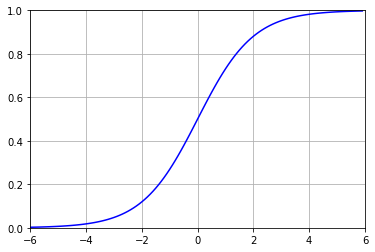

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.axis([-6,6,0,1])
plt.grid(True)
X = np.arange(-6,6,0.1)
y = 1/(1 + np.e ** (-X))
plt.plot(X,y,'b-')
plt.show()

# 垃圾短信分类

http://archive.ics.uci.edu/ml/machine-learning-databases/00228/

In [5]:
import pandas as pd
df = pd.read_csv('./some datasets/SMSSpamCollection',delimiter='\t',header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df[df[0]=='spam'][0].count()

747

In [7]:
df[df[0]=='ham'][0].count()

4825

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split

In [12]:
df = pd.read_csv('./some datasets/SMSSpamCollection',delimiter='\t',header=None)
X_train_raw,X_test_raw,y_train,y_test = train_test_split(df[1],df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

In [13]:
for i,prediction in enumerate(predictions[-5:]):
    print('预测类型：%s. 信息：%s' %(prediction,X_test_raw.iloc[i]))

预测类型：ham. 信息：Haiyoh... Maybe your hamster was jealous of million
预测类型：ham. 信息：Yes :)it completely in out of form:)clark also utter waste.
预测类型：ham. 信息：Probably money worries. Things are coming due and i have several outstanding invoices for work i did two and three months ago.
预测类型：ham. 信息：I can probably come by, everybody's done around  &lt;#&gt;  right?
预测类型：ham. 信息：I'm at bruce &amp; fowler now but I'm in my mom's car so I can't park (long story)


# 二元分类效果评估方法

## 准确率

[[4 1]
 [2 3]]


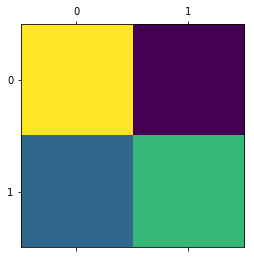

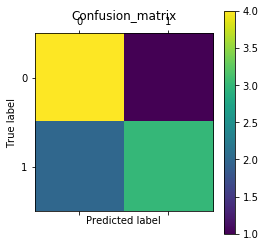

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion_matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
y_pred,y_true = [0,1,1,0],[1,1,1,1]
print('Accuracy:',accuracy_score(y_true,y_pred))

Accuracy: 0.5


In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
df = pd.read_csv('./some datasets/SMSSpamCollection',delimiter='\t',header=None)
X_train_raw,X_test_raw,y_train,y_test = train_test_split(df[1],df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
scores = cross_val_score(classifier,X_train,y_train,cv=5)
print(np.mean(scores),scores)

0.955490358995 [ 0.94976077  0.96172249  0.96291866  0.95334928  0.9497006 ]


## 精确率和召回率

报错解决：https://stackoverflow.com/questions/39187875/scikit-learn-script-giving-vastly-different-results-than-the-tutorial-and-gives

In [23]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
df = pd.read_csv('./some datasets/SMSSpamCollection',delimiter='\t',header=None)
encoded_labels = df[0].map(lambda x:1 if x=='spam' else 0).values
X_train_raw,X_test_raw,y_train,y_test = train_test_split(df[1],encoded_labels)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
precisions = cross_val_score(classifier,X_train,y_train,cv=5,scoring='precision')
print(np.mean(precisions),precisions)
recalls = cross_val_score(classifier,X_train,y_train,cv=5,scoring='recall')
print(np.mean(recalls),recalls)

0.986444392853 [ 0.98412698  0.98591549  0.975       0.98717949  1.        ]
0.669090909091 [ 0.56363636  0.63636364  0.70909091  0.7         0.73636364]


## 计算综合指标

In [24]:
f1s = cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1')
print(np.mean(f1s),f1s)

0.795722555156 [ 0.71676301  0.77348066  0.82105263  0.81914894  0.84816754]


## ROC和AUC

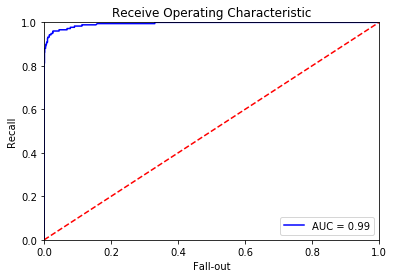

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc

df = pd.read_csv(r"./some datasets/SMSSpamCollection",delimiter='\t',header=None)
df['encoded_labels']= df[0].map(lambda x: 1 if x=='spam' else 0).values
X_train_raw,X_test_raw,y_train,y_test = train_test_split(df[1],df['encoded_labels'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict_proba(X_test)
false_positive_rate,recall,thresholds = roc_curve(y_test,predictions[:,1])
roc_auc = auc(false_positive_rate,recall)
plt.title('Receive Operating Characteristic')
plt.plot(false_positive_rate,recall,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

# 网格搜索

Grid search就是用来确定最优超参数得方法，原理就是选取可能的参数不断运行模型获取最佳效果，网格搜索用的是穷举法，其缺点在于即使每个超参数的取值范围都很小，计算量也是巨大的。不过这是一个并行问题，参数与参数彼此独立，计算过程不需要同步，所以有很多方法解决这个问题。scikit-learn有GridSearchCV()函数解决这个问题

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [23]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
 'vect__max_df': (0.25, 0.5, 0.75),
 'vect__stop_words': ('english', None),
 'vect__max_features': (2500, 5000, 10000, None),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__use_idf': (True, False),
 'vect__norm': ('l1', 'l2'),
 'clf__penalty': ('l1', 'l2'),
 'clf__C': (0.01, 0.1, 1, 10),
}

if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,
    verbose=1, scoring='accuracy', cv=3) #这里n_jobs=-1告诉grid search要自动识别机器有几个核，并使用所有的核并行跑程序
    df = pd.read_csv(r"./some datasets/SMSSpamCollection",delimiter='\t',header=None)
    X,y = df[1],df[0]
    X_train_raw,X_test_raw,y_train,y_test = train_test_split(X,y)
    grid_search.fit(X_train, y_train)
    print ('Best score: %0.3f' % grid_search.best_score_)
    print ('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r'%(param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


JoblibAttributeError: JoblibAttributeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Kismet\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Kismet\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001FC9EF89B70, fil...lib\site-packages\ipykernel\__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001FC9EF89B70, fil...lib\site-packages\ipykernel\__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2018-01-29T11:30:16.114282', 'msg_id': '36567C6AC35F469998A628E6B523DE6E', 'msg_type': 'execute_request', 'session': '1A7A050D4EF5479D90307064A128D331', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '36567C6AC35F469998A628E6B523DE6E', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1A7A050D4EF5479D90307064A128D331']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2018-01-29T11:30:16.114282', 'msg_id': '36567C6AC35F469998A628E6B523DE6E', 'msg_type': 'execute_request', 'session': '1A7A050D4EF5479D90307064A128D331', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '36567C6AC35F469998A628E6B523DE6E', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1A7A050D4EF5479D90307064A128D331'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2018-01-29T11:30:16.114282', 'msg_id': '36567C6AC35F469998A628E6B523DE6E', 'msg_type': 'execute_request', 'session': '1A7A050D4EF5479D90307064A128D331', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '36567C6AC35F469998A628E6B523DE6E', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))",), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))",)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.If object>], cell_name='<ipython-input-23-d60d91ed8f9e>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1fca4ce7518, executio..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001FCA6AA4540, file "<ipython-input-23-d60d91ed8f9e>", line 16>
        result = <ExecutionResult object at 1fca4ce7518, executio..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001FCA6AA4540, file "<ipython-input-23-d60d91ed8f9e>", line 16>, result=<ExecutionResult object at 1fca4ce7518, executio..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001FCA6AA4540, file "<ipython-input-23-d60d91ed8f9e>", line 16>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...Collection",delimiter=\'\\t\',header=None)\ndf.head()', "df['encoded_labels']= df[1].map(lambda x: 1 if x=='spam' else 0).values\ndf.head()", "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', "pipeline = Pipeline([\n    ('vect',TfidfVectorize...y':('11','12'),\n    'clf_c':(0.01,0.1,1,10)    \n}", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...                                                 ", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...print('Recall:',recall_score(y_test,predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...nt ('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n('vect', TfidfVectorizer(s...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1:       0                                         ...Nah I don't think he goes to usf, he lives aro..., 2:       0                                         ...k he goes to usf, he lives aro...               0, 5:          0                                      ...its name               0

[5572 rows x 3 columns], 7:          0                                      ...its name               0

[5572 rows x 3 columns]}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'X': 0       Go until jurong point, crazy.. Available... to its name
Name: 1, Length: 5572, dtype: object, 'X_test': <1393x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_test_raw': 2430    Guess who am I?This is the first time I ...ntury cm ...
Name: 1, Length: 1393, dtype: object, 'X_train': <4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...Collection",delimiter=\'\\t\',header=None)\ndf.head()', "df['encoded_labels']= df[1].map(lambda x: 1 if x=='spam' else 0).values\ndf.head()", "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', "pipeline = Pipeline([\n    ('vect',TfidfVectorize...y':('11','12'),\n    'clf_c':(0.01,0.1,1,10)    \n}", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...                                                 ", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...print('Recall:',recall_score(y_test,predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...nt ('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n('vect', TfidfVectorizer(s...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1:       0                                         ...Nah I don't think he goes to usf, he lives aro..., 2:       0                                         ...k he goes to usf, he lives aro...               0, 5:          0                                      ...its name               0

[5572 rows x 3 columns], 7:          0                                      ...its name               0

[5572 rows x 3 columns]}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'X': 0       Go until jurong point, crazy.. Available... to its name
Name: 1, Length: 5572, dtype: object, 'X_test': <1393x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_test_raw': 2430    Guess who am I?This is the first time I ...ntury cm ...
Name: 1, Length: 1393, dtype: object, 'X_train': <4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\Kismet\Documents\我的坚果云\Git\git_repository\DataMining\<ipython-input-23-d60d91ed8f9e> in <module>()
     17     grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,
     18     verbose=1, scoring='accuracy', cv=3) #这里n_jobs=-1告诉grid search要自动识别机器有几个核，并使用所有的核并行跑程序
     19     df = pd.read_csv(r"./some datasets/SMSSpamCollection",delimiter='\t',header=None)
     20     X,y = df[1],df[0]
     21     X_train_raw,X_test_raw,y_train,y_test = train_test_split(X,y)
---> 22     grid_search.fit(X_train, y_train)
     23     print ('Best score: %0.3f' % grid_search.best_score_)
     24     print ('Best parameters set:')
     25     best_parameters = grid_search.best_estimator_.get_params()
     26     for param_name in sorted(parameters.keys()):

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e...jobs', refit=True, scoring='accuracy', verbose=1), X=<4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=2577     ham
2605     ham
469      ham
5302     ...538      ham
Name: 0, Length: 4179, dtype: object)
    824         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    825             Target relative to X for classification or regression;
    826             None for unsupervised learning.
    827 
    828         """
--> 829         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...obs', refit=True, scoring='accuracy', verbose=1)>
        X = <4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>
        y = 2577     ham
2605     ham
469      ham
5302     ...538      ham
Name: 0, Length: 4179, dtype: object
        self.param_grid = {'clf__C': (0.01, 0.1, 1, 10), 'clf__penalty': ('l1', 'l2'), 'vect__max_df': (0.25, 0.5, 0.75), 'vect__max_features': (2500, 5000, 10000, None), 'vect__ngram_range': ((1, 1), (1, 2)), 'vect__norm': ('l1', 'l2'), 'vect__stop_words': ('english', None), 'vect__use_idf': (True, False)}
    830 
    831 
    832 class RandomizedSearchCV(BaseSearchCV):
    833     """Randomized search on hyper parameters.

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=3, error_score='raise',
       e...jobs', refit=True, scoring='accuracy', verbose=1), X=<4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=2577     ham
2605     ham
469      ham
5302     ...538      ham
Name: 0, Length: 4179, dtype: object, parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    568         )(
    569             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    570                                     train, test, self.verbose, parameters,
    571                                     self.fit_params, return_parameters=True,
    572                                     error_score=self.error_score)
--> 573                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    574                 for train, test in cv)
    575 
    576         # Out is a list of triplet: score, estimator, n_test_samples
    577         n_fits = len(out)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
AttributeError                                     Mon Jan 29 11:30:18 2018
PID: 3732                Python 3.6.0: C:\Users\Kismet\Anaconda3\python.exe
...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), <4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 2577     ham
2605     ham
469      ham
5302     ...538      ham
Name: 0, Length: 4179, dtype: object, make_scorer(accuracy_score), array([1304, 1306, 1309, ..., 4176, 4177, 4178]), array([   0,    1,    2, ..., 1402, 1403, 1404]), 1, {'clf__C': 0.01, 'clf__penalty': 'l1', 'vect__max_df': 0.25, 'vect__max_features': 2500, 'vect__ngram_range': (1, 1), 'vect__norm': 'l1', 'vect__stop_words': 'english', 'vect__use_idf': True}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), <4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 2577     ham
2605     ham
469      ham
5302     ...538      ham
Name: 0, Length: 4179, dtype: object, make_scorer(accuracy_score), array([1304, 1306, 1309, ..., 4176, 4177, 4178]), array([   0,    1,    2, ..., 1402, 1403, 1404]), 1, {'clf__C': 0.01, 'clf__penalty': 'l1', 'vect__max_df': 0.25, 'vect__max_features': 2500, 'vect__ngram_range': (1, 1), 'vect__norm': 'l1', 'vect__stop_words': 'english', 'vect__use_idf': True}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), X=<4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=2577     ham
2605     ham
469      ham
5302     ...538      ham
Name: 0, Length: 4179, dtype: object, scorer=make_scorer(accuracy_score), train=array([1304, 1306, 1309, ..., 4176, 4177, 4178]), test=array([   0,    1,    2, ..., 1402, 1403, 1404]), verbose=1, parameters={'clf__C': 0.01, 'clf__penalty': 'l1', 'vect__max_df': 0.25, 'vect__max_features': 2500, 'vect__ngram_range': (1, 1), 'vect__norm': 'l1', 'vect__stop_words': 'english', 'vect__use_idf': True}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1660 
   1661     try:
   1662         if y_train is None:
   1663             estimator.fit(X_train, **fit_params)
   1664         else:
-> 1665             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method Pipeline.fit of Pipeline(steps=[('....0001,
          verbose=0, warm_start=False))])>
        X_train = <2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>
        y_train = 5196    spam
1217    spam
1460    spam
2248    s...538      ham
Name: 0, Length: 2786, dtype: object
        fit_params = {}
   1666 
   1667     except Exception as e:
   1668         if error_score == 'raise':
   1669             raise

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\pipeline.py in fit(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), X=<2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=5196    spam
1217    spam
1460    spam
2248    s...538      ham
Name: 0, Length: 2786, dtype: object, **fit_params={})
    263         Returns
    264         -------
    265         self : Pipeline
    266             This estimator
    267         """
--> 268         Xt, fit_params = self._fit(X, y, **fit_params)
        Xt = undefined
        fit_params = {}
        self._fit = <bound method Pipeline._fit of Pipeline(steps=[(....0001,
          verbose=0, warm_start=False))])>
        X = <2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>
        y = 5196    spam
1217    spam
1460    spam
2248    s...538      ham
Name: 0, Length: 2786, dtype: object
    269         if self._final_estimator is not None:
    270             self._final_estimator.fit(Xt, y, **fit_params)
    271         return self
    272 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\pipeline.py in _fit(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), X=<2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=5196    spam
1217    spam
1460    spam
2248    s...538      ham
Name: 0, Length: 2786, dtype: object, **fit_params={})
    229         Xt = X
    230         for name, transform in self.steps[:-1]:
    231             if transform is None:
    232                 pass
    233             elif hasattr(transform, "fit_transform"):
--> 234                 Xt = transform.fit_transform(Xt, y, **fit_params_steps[name])
        Xt = <2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>
        transform.fit_transform = <bound method TfidfVectorizer.fit_transform of T...zer=None, use_idf=True,
        vocabulary=None)>
        y = 5196    spam
1217    spam
1460    spam
2248    s...538      ham
Name: 0, Length: 2786, dtype: object
        fit_params_steps = {'clf': {}, 'vect': {}}
        name = 'vect'
    235             else:
    236                 Xt = transform.fit(Xt, y, **fit_params_steps[name]) \
    237                               .transform(Xt)
    238         if self._final_estimator is None:

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py in fit_transform(self=TfidfVectorizer(analyzer='word', binary=False, d...izer=None, use_idf=True,
        vocabulary=None), raw_documents=<2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=5196    spam
1217    spam
1460    spam
2248    s...538      ham
Name: 0, Length: 2786, dtype: object)
   1347         Returns
   1348         -------
   1349         X : sparse matrix, [n_samples, n_features]
   1350             Tf-idf-weighted document-term matrix.
   1351         """
-> 1352         X = super(TfidfVectorizer, self).fit_transform(raw_documents)
        X = undefined
        self.fit_transform = <bound method TfidfVectorizer.fit_transform of T...zer=None, use_idf=True,
        vocabulary=None)>
        raw_documents = <2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>
   1353         self._tfidf.fit(X)
   1354         # X is already a transformed view of raw_documents so
   1355         # we set copy to False
   1356         return self._tfidf.transform(X, copy=False)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py in fit_transform(self=TfidfVectorizer(analyzer='word', binary=False, d...izer=None, use_idf=True,
        vocabulary=None), raw_documents=<2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, y=None)
    834         max_df = self.max_df
    835         min_df = self.min_df
    836         max_features = self.max_features
    837 
    838         vocabulary, X = self._count_vocab(raw_documents,
--> 839                                           self.fixed_vocabulary_)
        self.fixed_vocabulary_ = False
    840 
    841         if self.binary:
    842             X.data.fill(1)
    843 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py in _count_vocab(self=TfidfVectorizer(analyzer='word', binary=False, d...izer=None, use_idf=True,
        vocabulary=None), raw_documents=<2786x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, fixed_vocab=False)
    757         indptr = _make_int_array()
    758         values = _make_int_array()
    759         indptr.append(0)
    760         for doc in raw_documents:
    761             feature_counter = {}
--> 762             for feature in analyze(doc):
        feature = undefined
        analyze = <function VectorizerMixin.build_analyzer.<locals>.<lambda>>
        doc = <1x7512 sparse matrix of type '<class 'numpy.flo... stored elements in Compressed Sparse Row format>
    763                 try:
    764                     feature_idx = vocabulary[feature]
    765                     if feature_idx not in feature_counter:
    766                         feature_counter[feature_idx] = 1

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py in <lambda>(doc=<1x7512 sparse matrix of type '<class 'numpy.flo... stored elements in Compressed Sparse Row format>)
    236         elif self.analyzer == 'word':
    237             stop_words = self.get_stop_words()
    238             tokenize = self.build_tokenizer()
    239 
    240             return lambda doc: self._word_ngrams(
--> 241                 tokenize(preprocess(self.decode(doc))), stop_words)
        doc = <1x7512 sparse matrix of type '<class 'numpy.flo... stored elements in Compressed Sparse Row format>
    242 
    243         else:
    244             raise ValueError('%s is not a valid tokenization scheme/analyzer' %
    245                              self.analyzer)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py in <lambda>(x=<1x7512 sparse matrix of type '<class 'numpy.flo... stored elements in Compressed Sparse Row format>)
    202         else:
    203             raise ValueError('Invalid value for "strip_accents": %s' %
    204                              self.strip_accents)
    205 
    206         if self.lowercase:
--> 207             return lambda x: strip_accents(x.lower())
        x = <1x7512 sparse matrix of type '<class 'numpy.flo... stored elements in Compressed Sparse Row format>
        x.lower = undefined
    208         else:
    209             return strip_accents
    210 
    211     def build_tokenizer(self):

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\scipy\sparse\base.py in __getattr__(self=<1x7512 sparse matrix of type '<class 'numpy.flo... stored elements in Compressed Sparse Row format>, attr='lower')
    571         elif attr == 'imag':
    572             return self._imag()
    573         elif attr == 'size':
    574             return self.getnnz()
    575         else:
--> 576             raise AttributeError(attr + " not found")
        attr = 'lower'
    577 
    578     def transpose(self, axes=None, copy=False):
    579         """
    580         Reverses the dimensions of the sparse matrix.

AttributeError: lower not found
___________________________________________________________________________

# Multi-class classification多类分类

scikit-learn用one-vs.-all或one-vs.-the-rest方法实现多类分类，就是把多类中的每个类都作为二元分类处理。分类器预测样本不同类型，将具有最大置信水平的类型作为样本类型。LogisticRegression()通过one-vs.-all策略支持多类分类。

本例中，我们利用烂番茄（Rotten Tomatoes）网站影评短语数据对电影进行评价。每个影评可以归入下面5个类项：不给力（negative），不太给力（somewhat negative），中等（neutral），有点给力（somewhat positive）, 给力（positive）

In [25]:
import zipfile
#压缩节省空间
z = zipfile.ZipFile('./some datasets/train.tsv.zip')
df = pd.read_csv(z.open(z.namelist()[0]),header=0,delimiter='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [26]:
df.count()

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64

In [27]:
df.Phrase.head()

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
Name: Phrase, dtype: object

In [29]:
df.Sentiment.describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [31]:
df.Sentiment.value_counts()/df.Sentiment.count()

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
import zipfile

def main():
    pipeline = Pipeline([
        ('vect',TfidfVectorizer(stop_words='english')),
        ('clf',LogisticRegression())
    ])
    parameters = {
        'vect_max_df':(0.25,0.5),
        'vect_ngram_range':((1,1),(1,2)),
        'vect_use_idf':(True,False),
        'clf_c':(0.1,1,10),
    }

    z = zipfile.ZipFile('./some datasets/train.tsv.zip')
    df = pd.read_csv(z.open(z.namelist()[0]),header=0,delimiter='\t')
    X,y = df['Phrase'],df['Sentiment'].as_matrix()
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5)
    grid_search = GridSearchCV(pipeline,parameters,n_jobs=3,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    print('Best score: %0.3f'% grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('\t%s: %r' %(param_name,best_parameters[param_name]))

if __name__=='__main__':
    main()

Fitting 3 folds for each of 24 candidates, totalling 72 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Kismet\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Kismet\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001FC9EF89B70, fil...lib\site-packages\ipykernel\__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001FC9EF89B70, fil...lib\site-packages\ipykernel\__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\K...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2018-01-29T14:20:57.432807', 'msg_id': '9ACF52F94E4D4DB08FEA19ED659491DB', 'msg_type': 'execute_request', 'session': '1A7A050D4EF5479D90307064A128D331', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '9ACF52F94E4D4DB08FEA19ED659491DB', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1A7A050D4EF5479D90307064A128D331']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2018-01-29T14:20:57.432807', 'msg_id': '9ACF52F94E4D4DB08FEA19ED659491DB', 'msg_type': 'execute_request', 'session': '1A7A050D4EF5479D90307064A128D331', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '9ACF52F94E4D4DB08FEA19ED659491DB', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1A7A050D4EF5479D90307064A128D331'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2018-01-29T14:20:57.432807', 'msg_id': '9ACF52F94E4D4DB08FEA19ED659491DB', 'msg_type': 'execute_request', 'session': '1A7A050D4EF5479D90307064A128D331', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '9ACF52F94E4D4DB08FEA19ED659491DB', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()",), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()",)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="import pandas as pd\nfrom sklearn.feature_extract...aram_name]))\n\nif __name__=='__main__':\n    main()", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Import object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Import object>, <_ast.FunctionDef object>, <_ast.If object>], cell_name='<ipython-input-33-163cdae9aa8f>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1fca90de4e0, executio..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001FCA90BBC00, file "<ipython-input-33-163cdae9aa8f>", line 34>
        result = <ExecutionResult object at 1fca90de4e0, executio..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001FCA90BBC00, file "<ipython-input-33-163cdae9aa8f>", line 34>, result=<ExecutionResult object at 1fca90de4e0, executio..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001FCA90BBC00, file "<ipython-input-33-163cdae9aa8f>", line 34>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...Collection",delimiter=\'\\t\',header=None)\ndf.head()', "df['encoded_labels']= df[1].map(lambda x: 1 if x=='spam' else 0).values\ndf.head()", "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', "pipeline = Pipeline([\n    ('vect',TfidfVectorize...y':('11','12'),\n    'clf_c':(0.01,0.1,1,10)    \n}", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...                                                 ", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...print('Recall:',recall_score(y_test,predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...nt ('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n('vect', TfidfVectorizer(s...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1:       0                                         ...Nah I don't think he goes to usf, he lives aro..., 2:       0                                         ...k he goes to usf, he lives aro...               0, 5:          0                                      ...its name               0

[5572 rows x 3 columns], 7:          0                                      ...its name               0

[5572 rows x 3 columns], 25:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  , 26: PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64, 27: 0    A series of escapades demonstrating the ada...               series
Name: Phrase, dtype: object, 29: count    156060.000000
mean          2.063578
st...         4.000000
Name: Sentiment, dtype: float64, 30: 2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64, 31: 2    0.509945
3    0.210989
1    0.174760
4    0...990
0    0.045316
Name: Sentiment, dtype: float64}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'X': 0       Go until jurong point, crazy.. Available... to its name
Name: 1, Length: 5572, dtype: object, 'X_test': <1393x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_test_raw': 2430    Guess who am I?This is the first time I ...ntury cm ...
Name: 1, Length: 1393, dtype: object, 'X_train': <4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nimport ma...Collection",delimiter=\'\\t\',header=None)\ndf.head()', "df['encoded_labels']= df[1].map(lambda x: 1 if x=='spam' else 0).values\ndf.head()", "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...l('Recall')\n# plt.xlabel('Fall-out')\n# plt.show()", 'df', "import numpy as np\nimport pandas as pd\nimport ma...label('Recall')\nplt.xlabel('Fall-out')\nplt.show()", 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', 'import pandas as pd\nfrom sklearn.feature_extract...mport precision_score,recall_score,accuracy_score', "pipeline = Pipeline([\n    ('vect',TfidfVectorize...y':('11','12'),\n    'clf_c':(0.01,0.1,1,10)    \n}", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...                                                 ", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...print('Recall:',recall_score(y_test,predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...nt ('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect',TfidfVectorize...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n('vect', TfidfVectorizer(s...int('Recall:', recall_score(y_test, predictions))", "pipeline = Pipeline([\n    ('vect', TfidfVectoriz...int('Recall:', recall_score(y_test, predictions))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {1:       0                                         ...Nah I don't think he goes to usf, he lives aro..., 2:       0                                         ...k he goes to usf, he lives aro...               0, 5:          0                                      ...its name               0

[5572 rows x 3 columns], 7:          0                                      ...its name               0

[5572 rows x 3 columns], 25:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  , 26: PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64, 27: 0    A series of escapades demonstrating the ada...               series
Name: Phrase, dtype: object, 29: count    156060.000000
mean          2.063578
st...         4.000000
Name: Sentiment, dtype: float64, 30: 2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64, 31: 2    0.509945
3    0.210989
1    0.174760
4    0...990
0    0.045316
Name: Sentiment, dtype: float64}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'X': 0       Go until jurong point, crazy.. Available... to its name
Name: 1, Length: 5572, dtype: object, 'X_test': <1393x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_test_raw': 2430    Guess who am I?This is the first time I ...ntury cm ...
Name: 1, Length: 1393, dtype: object, 'X_train': <4179x7512 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\Kismet\Documents\我的坚果云\Git\git_repository\DataMining\<ipython-input-33-163cdae9aa8f> in <module>()
     30     best_parameters = grid_search.best_estimator_.get_params()
     31     for param_name in sorted(parameters.keys()):
     32         print('\t%s: %r' %(param_name,best_parameters[param_name]))
     33 
     34 if __name__=='__main__':
---> 35     main()
     36 
     37 
     38 
     39 

...........................................................................
C:\Users\Kismet\Documents\我的坚果云\Git\git_repository\DataMining\<ipython-input-33-163cdae9aa8f> in main()
     22     z = zipfile.ZipFile('./some datasets/train.tsv.zip')
     23     df = pd.read_csv(z.open(z.namelist()[0]),header=0,delimiter='\t')
     24     X,y = df['Phrase'],df['Sentiment'].as_matrix()
     25     X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5)
     26     grid_search = GridSearchCV(pipeline,parameters,n_jobs=3,verbose=1,scoring='accuracy')
---> 27     grid_search.fit(X_train,y_train)
     28     print('Best score: %0.3f'% grid_search.best_score_)
     29     print('Best parameters set:')
     30     best_parameters = grid_search.best_estimator_.get_params()
     31     for param_name in sorted(parameters.keys()):

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...jobs', refit=True, scoring='accuracy', verbose=1), X=36942                                           ...ltures
Name: Phrase, Length: 78030, dtype: object, y=array([2, 4, 2, ..., 2, 3, 2], dtype=int64))
    824         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    825             Target relative to X for classification or regression;
    826             None for unsupervised learning.
    827 
    828         """
--> 829         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...obs', refit=True, scoring='accuracy', verbose=1)>
        X = 36942                                           ...ltures
Name: Phrase, Length: 78030, dtype: object
        y = array([2, 4, 2, ..., 2, 3, 2], dtype=int64)
        self.param_grid = {'clf_c': (0.1, 1, 10), 'vect_max_df': (0.25, 0.5), 'vect_ngram_range': ((1, 1), (1, 2)), 'vect_use_idf': (True, False)}
    830 
    831 
    832 class RandomizedSearchCV(BaseSearchCV):
    833     """Randomized search on hyper parameters.

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=None, error_score='raise',
     ...jobs', refit=True, scoring='accuracy', verbose=1), X=36942                                           ...ltures
Name: Phrase, Length: 78030, dtype: object, y=array([2, 4, 2, ..., 2, 3, 2], dtype=int64), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    568         )(
    569             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    570                                     train, test, self.verbose, parameters,
    571                                     self.fit_params, return_parameters=True,
    572                                     error_score=self.error_score)
--> 573                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    574                 for train, test in cv)
    575 
    576         # Out is a list of triplet: score, estimator, n_test_samples
    577         n_fits = len(out)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=3), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=3)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Jan 29 14:21:06 2018
PID: 5228                Python 3.6.0: C:\Users\Kismet\Anaconda3\python.exe
...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), 36942                                           ...ltures
Name: Phrase, Length: 78030, dtype: object, array([2, 4, 2, ..., 2, 3, 2], dtype=int64), make_scorer(accuracy_score), array([25666, 25668, 25672, ..., 78027, 78028, 78029]), array([    0,     1,     2, ..., 26323, 26345, 26356]), 1, {'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), 36942                                           ...ltures
Name: Phrase, Length: 78030, dtype: object, array([2, 4, 2, ..., 2, 3, 2], dtype=int64), make_scorer(accuracy_score), array([25666, 25668, 25672, ..., 78027, 78028, 78029]), array([    0,     1,     2, ..., 26323, 26345, 26356]), 1, {'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), X=36942                                           ...ltures
Name: Phrase, Length: 78030, dtype: object, y=array([2, 4, 2, ..., 2, 3, 2], dtype=int64), scorer=make_scorer(accuracy_score), train=array([25666, 25668, 25672, ..., 78027, 78028, 78029]), test=array([    0,     1,     2, ..., 26323, 26345, 26356]), verbose=1, parameters={'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1649     fit_params = fit_params if fit_params is not None else {}
   1650     fit_params = dict([(k, _index_param_value(X, v, train))
   1651                       for k, v in fit_params.items()])
   1652 
   1653     if parameters is not None:
-> 1654         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(st....0001,
          verbose=0, warm_start=False))])>
        parameters = {'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True}
   1655 
   1656     start_time = time.time()
   1657 
   1658     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\pipeline.py in set_params(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), **kwargs={'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True})
    175 
    176         Returns
    177         -------
    178         self
    179         """
--> 180         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BasePipeline._set_params of Pipel....0001,
          verbose=0, warm_start=False))])>
        kwargs = {'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True}
    181         return self
    182 
    183     def _validate_steps(self):
    184         names, estimators = zip(*self.steps)

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\pipeline.py in _set_params(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), steps_attr='steps', **params={'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True})
     64         step_names, _ = zip(*getattr(self, steps_attr))
     65         for name in list(six.iterkeys(params)):
     66             if '__' not in name and name in step_names:
     67                 self._replace_step(steps_attr, name, params.pop(name))
     68         # 3. Step parameters and other initilisation arguments
---> 69         super(_BasePipeline, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(st....0001,
          verbose=0, warm_start=False))])>
        params = {'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True}
     70         return self
     71 
     72     def _validate_names(self, names):
     73         if len(set(names)) != len(names):

...........................................................................
C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\base.py in set_params(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), **params={'clf_c': 0.1, 'vect_max_df': 0.25, 'vect_ngram_range': (1, 1), 'vect_use_idf': True})
    286                 # simple objects case
    287                 if key not in valid_params:
    288                     raise ValueError('Invalid parameter %s for estimator %s. '
    289                                      'Check the list of available parameters '
    290                                      'with `estimator.get_params().keys()`.' %
--> 291                                      (key, self.__class__.__name__))
        key = 'clf_c'
        self.__class__.__name__ = 'Pipeline'
    292                 setattr(self, key, value)
    293         return self
    294 
    295     def __repr__(self):

ValueError: Invalid parameter clf_c for estimator Pipeline. Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

# 多标签分类转换

In [35]:
import numpy as np
from sklearn.metrics import hamming_loss, jaccard_similarity_score
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]])))
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]])))
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]])))
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[0.0, 1.0], [1.0, 1.0]])))
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [1.0, 1.0]])))
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]), np.array([[1.0, 1.0], [0.0, 1.0]])))

0.0
0.25
0.5
1.0
0.75
0.5
